<a href="https://colab.research.google.com/github/Svet-Bug/Projects/blob/main/ProjectClassif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

после просмотра презентации настало время практики 🙌

In [9]:
# установка библиотеки
! pip3 list
! pip3 install sklearn

Package                       Version            
----------------------------- -------------------
absl-py                       0.12.0             
alabaster                     0.7.12             
albumentations                0.1.12             
altair                        4.1.0              
appdirs                       1.4.4              
argon2-cffi                   20.1.0             
arviz                         0.11.2             
astor                         0.8.1              
astropy                       4.2.1              
astunparse                    1.6.3              
async-generator               1.10               
atari-py                      0.2.9              
atomicwrites                  1.4.0              
attrs                         21.2.0             
audioread                     2.1.9              
autograd                      1.3                
Babel                         2.9.1              
backcall                      0.2.0              


# Naive Bayes (Наивный Байес)

Давайте сделаем простую классификацию писем на "спам/не спам". Например, на [этих данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset)



In [4]:
# ячейка импортов

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm

# from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [23]:
! ls

sample_data  SourceCSV.csv  SourceSCV.csv


In [5]:
# import os
# os.getcwd()

'/content'

In [6]:
# from google.colab import files
# uploaded = files.upload()

Saving SourceCSV_UTF8.csv to SourceCSV_UTF8.csv


In [7]:
# data = pd.read_csv(uploaded)
# data.head(10)

ValueError: ignored

b'Skipping line 6: expected 2 fields, saw 3\nSkipping line 9: expected 2 fields, saw 4\nSkipping line 18: expected 2 fields, saw 4\nSkipping line 19: expected 2 fields, saw 3\nSkipping line 22: expected 2 fields, saw 14\nSkipping line 23: expected 2 fields, saw 4\nSkipping line 25: expected 2 fields, saw 4\nSkipping line 26: expected 2 fields, saw 3\nSkipping line 28: expected 2 fields, saw 4\nSkipping line 29: expected 2 fields, saw 3\nSkipping line 31: expected 2 fields, saw 3\nSkipping line 32: expected 2 fields, saw 9\nSkipping line 36: expected 2 fields, saw 4\nSkipping line 37: expected 2 fields, saw 7\nSkipping line 38: expected 2 fields, saw 4\nSkipping line 39: expected 2 fields, saw 5\nSkipping line 41: expected 2 fields, saw 4\nSkipping line 42: expected 2 fields, saw 7\nSkipping line 43: expected 2 fields, saw 4\nSkipping line 49: expected 2 fields, saw 3\nSkipping line 50: expected 2 fields, saw 4\nSkipping line 52: expected 2 fields, saw 4\nSkipping line 56: expected 2 fi

,1;Не смог изменить но по телефона в настройках и вообще там ничего не поменять;11.06.2021;3;Bobby Digital;GOOD
2;Чудо приложение. За 3 месяца так и не запустилось,постоянно пишет про отсутствие подключение к ...
3;Не получается отредактировать личную информацию -изменился номер телефона;04.06.2021;3;Владимир Пупкин;GOOD,NaN
4;Не работает;20.05.2021;1;Алексей Панов;BAD,NaN
5;При переходе на госуслуги,долго думает Надеюсь пригодится только для оф...
7;Го..но,не ставьте;12.05.2021;1;Alexandr Pavlov;BAD
8;Не работает.;11.05.2021;1;Egor Mall;BAD,NaN
10;Сервис не доступен,попробуйте позже. И так весь день.;03.05.2021...
11;Приложение не работает. Просто предлагает вызвать гибдд.;30.05.2021;1;Васисуалий Лоханкин;BAD,NaN
12;Так и смогло найти меня по карте ((10 минут зря потраченного времени;19.04.2021;1;Arsenii Semenov;BAD,NaN
13;Не открывается;12.04.2021;1;Герман Дьяченко;BAD,NaN


In [10]:
pip install openpyxl xlsxwriter xlrd

     |████████████████████████████████| 153kB 7.7MB/s 


In [16]:
Data = pd.read_excel('https://github.com/Svet-Bug/Projects/blob/main/Source.xlsx?raw=true', index_col='п\п')#прочитали файл Excel, 
# по умолчанию Pandas задает свою колоку с индексами, поэтому указала в качестве индексной колонки "п\п"
Data.head(20)

,Отзыв,Дата,Звезды,Имя,Оценка
п\п,,,,,
1,Не смог изменить но по телефона в настройках и...,2021-06-11,3,Bobby Digital,GOOD
2,Чудо приложение. За 3 месяца так и не запустил...,2021-06-06,1,Владимир Паршин,BAD
3,Не получается отредактировать личную информаци...,2021-06-04,3,Владимир Пупкин,GOOD
4,Не работает,2021-05-20,1,Алексей Панов,BAD
5,"При переходе на госуслуги, долго думает Надеюс...",2021-05-19,4,кидус,GOOD
6,Сделайте оповещение пострадавшего по вводу ном...,2021-05-14,4,Александр П,GOOD
7,"Го..но, не ставьте",2021-05-12,1,Alexandr Pavlov,BAD
8,Не работает.,2021-05-11,1,Egor Mall,BAD
9,"Установил приложение и первое, что увидел: ""се...",2021-05-05,1,Emil Agadzhanyan,BAD


In [18]:
DataRN = Data.rename(columns={"п\п": "index", "Отзыв": "content", "Дата": "Date", "Звезды":"Stars", "Имя":"Author", "Оценка":"Estimation"})
display(DataRN)

,content,Date,Stars,Author,Estimation
п\п,,,,,
1,Не смог изменить но по телефона в настройках и...,2021-06-11,3,Bobby Digital,GOOD
2,Чудо приложение. За 3 месяца так и не запустил...,2021-06-06,1,Владимир Паршин,BAD
3,Не получается отредактировать личную информаци...,2021-06-04,3,Владимир Пупкин,GOOD
4,Не работает,2021-05-20,1,Алексей Панов,BAD
5,"При переходе на госуслуги, долго думает Надеюс...",2021-05-19,4,кидус,GOOD
...,...,...,...,...,...
961,Надеюсь не воспользуюсь Идея правильная,2019-11-01,5,adeptusbonus,GOOD
962,Ставлю пятак))) Дальше поглядим. Надеюсь что о...,2019-11-01,5,Den4sss,GOOD
963,Не могу ввести свои загранправа (в формате XX-...,2019-11-01,2,paramtadam,BAD


In [20]:
# Поcмотрим, можно ли убрать столбец, например уберем столбец "Дата"
DataRN_1 = DataRN.drop(['Date'],axis=1)

display(DataRN_1)

,content,Stars,Author,Estimation
п\п,,,,
1,Не смог изменить но по телефона в настройках и...,3,Bobby Digital,GOOD
2,Чудо приложение. За 3 месяца так и не запустил...,1,Владимир Паршин,BAD
3,Не получается отредактировать личную информаци...,3,Владимир Пупкин,GOOD
4,Не работает,1,Алексей Панов,BAD
5,"При переходе на госуслуги, долго думает Надеюс...",4,кидус,GOOD
...,...,...,...,...
961,Надеюсь не воспользуюсь Идея правильная,5,adeptusbonus,GOOD
962,Ставлю пятак))) Дальше поглядим. Надеюсь что о...,5,Den4sss,GOOD
963,Не могу ввести свои загранправа (в формате XX-...,2,paramtadam,BAD


Распределение отзывов на хорошие и плохие

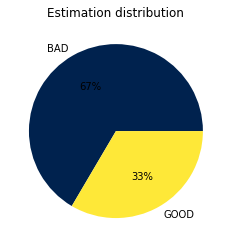

In [26]:
classes =pd.value_counts(DataRN["Estimation"])

classes.plot(kind = 'pie',  autopct='%0.f%%', colormap='cividis') 

plt.title("Estimation distribution")

plt.ylabel('')

plt.show()

**Анализ**

Посчитать частоты слов во всех отзывах, а также отдельно в хороших и плохих, потом слова будут признаками (features) в алгоритме. 
Нужно посмотреть самые частотные слова и если они будут повторяться во всех списках, занести их в стоп-слова.

Для создания списков используем Counter из collections.

In [40]:
Counter(" ".join(DataRN[DataRN['Estimation']=='BAD']["content"]).split()).most_common(50) 

[('не', 549),
 ('и', 352),
 ('в', 258),
 ('на', 218),
 ('Не', 188),
 ('что', 168),
 ('с', 144),
 ('приложение', 109),
 ('работает', 94),
 ('а', 81),
 ('через', 76),
 ('Приложение', 74),
 ('это', 71),
 ('по', 68),
 ('как', 67),
 ('все', 66),
 ('-', 62),
 ('нет', 60),
 ('к', 58),
 ('приложения', 54),
 ('для', 54),
 ('работает.', 52),
 ('данные', 51),
 ('у', 50),
 ('В', 50),
 ('пишет', 46),
 ('я', 46),
 ('при', 46),
 ('временно', 43),
 ('меня', 43),
 ('то', 42),
 ('ДТП', 42),
 ('только', 41),
 ('приложение.', 40),
 ('При', 39),
 ('А', 38),
 ('без', 38),
 ('от', 37),
 ('уже', 37),
 ('так', 36),
 ('если', 35),
 ('приложение,', 35),
 ('На', 34),
 ('госуслуги', 32),
 ('И', 31),
 ('о', 31),
 ('но', 30),
 ('за', 30),
 ('из', 29),
 ('хотя', 29)]

In [43]:
# 20 самых частотных в хороших отзывах
count1 = Counter(" ".join(DataRN[DataRN['Estimation']=='GOOD']["content"]).lower().split()).most_common(30) 
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in GOOD", 1 : "count"})

# то же для плохих отзывов
count2 = Counter(" ".join(DataRN[DataRN['Estimation']=='BAD']["content"]).lower().split()).most_common(30)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in BAD", 1 : "count"})

display(df1,df2)

,words in GOOD,count
0,не,237
1,в,216
2,и,158
3,приложение,82
4,на,77
5,все,60
6,по,55
7,с,53
8,а,49
9,данные,47


,words in BAD,count
0,не,747
1,и,383
2,в,308
3,на,252
4,что,187
5,приложение,183
6,с,162
7,а,119
8,работает,98
9,как,98


Уберем стоп-слова.

In [53]:
! pip3 install nltk
import nltk
nltk.download("stopwords")
# from nltk.corpus import stopwords
stops = list(stopwords.words('russian')+ ['приложение', 'приложения', 'данные','если'] )
display(stops)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [56]:
f = feature_extraction.text.CountVectorizer(stop_words = frozenset(list(stopwords.words('russian')+ ['приложение', 'приложения', 'данные','если'] )))
display(f)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=frozenset({'а', 'без', 'более', 'больше', 'будет',
                                      'будто', 'бы', 'был', 'была', 'были',
                                      'было', 'быть', 'в', 'вам', 'вас',
                                      'вдруг', 'ведь', 'во', 'вот', 'впрочем',
                                      'все', 'всегда', 'всего', 'всех', 'всю',
                                      'вы', 'где', 'да', 'даже', 'данные', ...}),
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [57]:
DataRN["content"]

п\п
1      Не смог изменить но по телефона в настройках и...
2      Чудо приложение. За 3 месяца так и не запустил...
3      Не получается отредактировать личную информаци...
4                                            Не работает
5      При переходе на госуслуги, долго думает Надеюс...
                             ...                        
961              Надеюсь не воспользуюсь Идея правильная
962    Ставлю пятак))) Дальше поглядим. Надеюсь что о...
963    Не могу ввести свои загранправа (в формате XX-...
964    Дизайн интерфейса современный, пошаговая регис...
965    В ожидание чуда, интерфейс пока не совсем удоб...
Name: content, Length: 965, dtype: object

In [58]:
X = f.fit_transform(DataRN["content"])
print(f.get_feature_names()) # посмотрим на признаки

# display(X.shape)
# display(X.toarray())

['000', '002ат', '01', '02', '03', '04', '07', '09', '10', '100', '10й', '10м', '11', '12', '12345678', '13', '14', '15', '15мин', '16', '19', '1940', '1957', '1963', '1971', '1972', '1976', '1979', '1984', '1988', '1992', '1993', '20', '2017', '2018', '2019', '2020', '2020г', '2021', '2105', '21053', '2110', '21144', '24', '28', '2й', '2х', '30', '300м', '3км', '3х', '40', '400', '400тыщ', '45', '49', '4g', '50', '55', '588', '59', '60', '76мбит', '800', '816', '82', '8x', '90', '90е', '9x', '________________________________________', 'a5', 'adguard', 'adguardы', 'android', 'android10', 'anyconnect', 'apple', 'boost', 'code', 'cool', 'desire', 'edg', 'efternamn', 'end', 'f1', 'f2', 'face', 'fi', 'firefox', 'firewall', 'g5s', 'g973f', 'galaxy', 'gdpr', 'good', 'google', 'gps', 'gsm', 'hide', 'highscreen', 'honor', 'htc', 'huawei', 'id', 'ios', 'ios12', 'ipad', 'iphone', 'jetta', 'linage', 'lineageos', 'lite', 'magisk', 'mail', 'max', 'mi', 'mi6', 'mi9', 'mi9se', 'mini', 'mix2', 'motoro

метод ```.fit_transform()``` выучивает обучающие данные и возвращает матрицу формата "документ-термин" для всего датасета

Сейчас у нас 8404 признака (по числу уникальных слов в корпусе). Новый признак  j  в ряду i  равен 1 если слово j  появляется в тексте i . В ином случае значение признака = 0

**давайте попробуем предсказать:** окажется ли письмо спамом или не спамом

Следует помнить о двух нежелательных вариантах:

- спам-письмо классифицируется как нормальное (False Negative)
- обычное письмо классифицируется как спам (False positive).
(какой вариант хуже?)

Сначала, представим значения spam/ham как числовые (1,0) 

In [ ]:
data

,spam,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Затем разделим данные на обучающую и тестовую выборку [этой функцией](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
data["spam"]=data["spam"].map({'spam':1,'ham':0}) # в первой колонке переименуем значения 'spam' в 1  и 'ham' в 0

data

,spam,content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Создадим новые переменные:
- X_train - кусочек матрицы "документ/термин", который мы "отдадим" алгоритму для обучения
- X_test - кусочек матрицы "документ/термин", на котором будем проверять, как алгоритм сработал 
- y_train - кусочек датафрейма с текстами, который мы отдадим для обучения
- y_test -  кусочек датафрейма с текстами, на котором будем проверять, как алгоритм сработал 

In [ ]:
# новые переменные
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['spam'], 
                                                                    test_size=0.2, random_state=50)

# print(X_train.shape, X_test.shape)
sum(y_test == 1)

161

алгоритмов наивного байеса несколько, мы возьмем [Multinomial NB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

[дополнительная информация про Naive Bayes](https://nlp.stanford.edu/IR-book/pdf/13bayes.pdf)

Так как алгоритм быстрый, попробуем несколько вариантов с разным параметром регуляризации α *([что такое α ?](https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf))*

Затем для каждого проверим Precision, Recall и Accuracy

In [ ]:
list_alpha = np.arange(1/100000, 20, 0.11) 
#возьмем лист равномерно распределенных значений от 1/100000 до 20(можно выбрать другие числа,эти были выбраны экспериментально)


score_train = np.zeros(len(list_alpha)) # задали пустые списки по длине изначального листа
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0

In [ ]:
for alpha in list_alpha: # для каждого значения в списке альф
    bayes = naive_bayes.MultinomialNB(alpha=alpha) # используем модель
    bayes.fit(X_train, y_train) # тренируем модель
    
    score_train[count] = bayes.score(X_train, y_train) # итерируемся по индексу в листе, добавляем значения accuracy
    # score_train? 
    
    score_test[count]= bayes.score(X_test, y_test)
    # score_test ? 
    
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    
    count = count + 1 # после одной итерации, делаем новый шаг

посмотрим на 10 лучших моделей

In [ ]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])


display(models.head(10))

display(matrix.shape)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.997756,0.976682,0.919255,0.919255
1,0.11001,0.996635,0.978475,0.944099,0.910180
2,0.22001,0.995961,0.978475,0.950311,0.905325
3,0.33001,0.995513,0.982960,0.950311,0.932927
4,0.44001,0.995288,0.982063,0.950311,0.927273
5,0.55001,0.994840,0.981166,0.944099,0.926829
6,0.66001,0.994840,0.981166,0.937888,0.932099
7,0.77001,0.994840,0.980269,0.931677,0.931677
8,0.88001,0.994840,0.979372,0.925466,0.931250
9,0.99001,0.994840,0.977578,0.913043,0.930380


(182, 5)


а теперь давайте оставим модель с наивысшей test precision

In [ ]:
best_index = models['Test Precision'].idxmax()
best_index

# display(best_index)

display(models.iloc[best_index])

alpha             5.830010
Train Accuracy    0.990128
Test Accuracy     0.976682
Test Recall       0.838509
Test Precision    1.000000
Name: 53, dtype: float64

Посмотрим, есть ли модели со 100% Precision

In [ ]:
models[models['Test Recall']>0.9].sort_values(by="Test Precision", ascending = False)


,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
17,1.87001,0.993718,0.980269,0.900621,0.960265
16,1.76001,0.993493,0.980269,0.900621,0.960265
12,1.32001,0.994840,0.979372,0.900621,0.953947
15,1.65001,0.993493,0.979372,0.900621,0.953947
14,1.54001,0.994166,0.979372,0.900621,0.953947
13,1.43001,0.994615,0.979372,0.900621,0.953947
3,0.33001,0.995513,0.982960,0.950311,0.932927
6,0.66001,0.994840,0.981166,0.937888,0.932099
7,0.77001,0.994840,0.980269,0.931677,0.931677
8,0.88001,0.994840,0.979372,0.925466,0.931250


Давайте из них выберем те, у которых наибольшее accuracy

In [ ]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()

models.iloc[best_index]


alpha             5.830010
Train Accuracy    0.990128
Test Accuracy     0.976682
Test Recall       0.838509
Test Precision    1.000000
Name: 53, dtype: float64

### сделаем предикшн

In [ ]:
bayes = naive_bayes.MultinomialNB(alpha= 5.830010) # используем лучшую модель
bayes.fit(X_train, y_train) # тренируем алгоритм на данных

bayes.predict(X_test) # метод для предсказания

# сделаем датафрейм с колонками для настоящего класса и для предсказанного

new_df = pd.DataFrame(data = y_test)
new_df["predicted"]=bayes.predict(X_test) # добавляем новую колонку с предсказаниями

new_df

,spam,predicted
3409,0,0
2103,0,0
2665,0,0
3239,0,0
1205,0,0
...,...,...
5020,0,0
2141,0,0
1265,0,0
4094,0,0


давайте построим матрицу ошибок ([как работает матрица ошибок](https://en.wikipedia.org/wiki/Confusion_matrix))

In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))


pd.DataFrame(data = m_confusion_test, columns = ['Predicted ham', 'Predicted spam'],
            index = ['Actual ham', 'Actual spam'])

,Predicted ham,Predicted spam
Actual ham,954,0
Actual spam,26,135


Заметим, что так как мы определили лейбл spam как класс 1, наша табличка "перевернута" и начинается с True Negative (Actual ham x Predicted ham) 
Сколько сообщений получились False Positive? Сколько False Negative?

# Support Vector Machines (SVM, метод опорных векторов)

попробуем сделать ту же задачу, с алгоритмом SVM

In [ ]:
list_C = np.arange(500, 2000, 100) #100000

score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

посмотрим на 10 первых моделей и их метрики:

In [ ]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,1.0,0.970404,0.801242,0.992308
1,600.0,1.0,0.970404,0.801242,0.992308
2,700.0,1.0,0.970404,0.801242,0.992308
3,800.0,1.0,0.970404,0.801242,0.992308
4,900.0,1.0,0.970404,0.801242,0.992308
5,1000.0,1.0,0.970404,0.801242,0.992308
6,1100.0,1.0,0.970404,0.801242,0.992308
7,1200.0,1.0,0.970404,0.801242,0.992308
8,1300.0,1.0,0.970404,0.801242,0.992308
9,1400.0,1.0,0.970404,0.801242,0.992308


выберем модель с лучшим test precision

In [ ]:
best_index = models['Test Precision'].idxmax()

display(models.iloc[best_index, :])

C                 500.000000
Train Accuracy      1.000000
Test Accuracy       0.970404
Test Recall         0.801242
Test Precision      0.992308
Name: 0, dtype: float64

In [ ]:
# посмотрим на модели с почти 100% Precision

models[models['Test Precision']>0.99].head(5)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,1.0,0.970404,0.801242,0.992308
1,600.0,1.0,0.970404,0.801242,0.992308
2,700.0,1.0,0.970404,0.801242,0.992308
3,800.0,1.0,0.970404,0.801242,0.992308
4,900.0,1.0,0.970404,0.801242,0.992308


In [ ]:
best_index = models[models['Test Precision']>0.99]['Test Accuracy'].idxmax()
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      1.000000
Test Accuracy       0.970404
Test Recall         0.801242
Test Precision      0.992308
Name: 0, dtype: float64

построим матрицу ошибок для SVM

In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,953,1
Actual 1,32,129
